In [20]:
import pandas as pd
import json
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import sklearn.metrics.pairwise as pw
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

In [21]:
# Load data for town called Cleveland
data_path = './data/cleveland/'
review_file = 'review.json'
business_file = 'business.json'
user_file = 'user.json'
tip_file = 'tip.json'
checkin_file = 'checkin.json'

reviews = load_jsons(data_path, review_file)
businesses = load_jsons(data_path, business_file)
users = load_jsons(data_path, user_file)
tips = load_jsons(data_path, tip_file)
checkins = load_jsons(data_path, checkin_file)

In [3]:
usersabove10 = users.where(users['review_count'] >= 10).dropna()['user_id'].to_list()

reviewsabove10 = reviews.copy()
reviewsabove10 = reviewsabove10[reviewsabove10['user_id'].isin(usersabove10)]

training_set, test_set = train_test_split(reviewsabove10, test_size=0.20)

In [4]:
def pivot_reviews(df):
    """ takes a rating table as input and computes the utility matrix """
    return pd.pivot_table(df, values='stars', index= 'user_id',columns='business_id', aggfunc='last', fill_value=np.nan)

#user based utility matrix
utility_matrix = pivot_reviews(training_set)


missed_users = list(set(reviewsabove10['user_id']) - set(utility_matrix.index))
missed_businesses = list(set(reviewsabove10['business_id']) - set(utility_matrix.columns))
missed = pd.DataFrame(index = missed_users, columns = missed_businesses)

utility_matrix = utility_matrix.append(missed).fillna(np.nan)

display(utility_matrix)

,-1vulUmD1pYf0uvXBY1Fzg,-5sQihzwgmq7tuAyUh7RSw,-7weOHmN5s487aq-7zMbtw,-D8DPlf_b5EBTFhsTjFdZw,-DU8jf5nA1_yaOqsKsLqmw,-DYPu72JHFKno3lAaUWyFw,-DkhPijabXuTNvNteIpRPw,-Eu04UHRqmGGyvYRDY8-tg,-F0B5F1YLx7093otwgboxw,-GQzMguGfB4jswo8jAO7CQ,...,ZkRfJm4XjUpvYlNpVAiQYA,JNtCEm01dDzZFCKnW3s-6Q,ZGfWX_-2rOz1CqBAj5SVkw,KwRc96EnOZmUIFd2Kx5LrQ,tYAur4ptvyJu6mO99ULyJw,o5jKW_A2PInNvHYBj-sCyg,pfWMMd1V1TwDd7ZVaVBgLQ,S0c5lyLw1jM4rICbm5WrHw,w5lhoqX_wvyBedYmGiKWxQ,kWOnki4kHCQ-pDouc3LNBQ
--6CV8BPNofy7jt1JavD-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--RvKroUUxMmTo70EnD5mQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--_nP6G2mAHyrEFtIG6ggw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--amZ_cR9Zgu4B1RrAHJyA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--kedvpjB1PT28X_gArafA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H4_YPiEqsGYiUWWHx63h9Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IZUhhvVDXBFhXql5zeGGQw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WlZBq94Q4z_RIsZn939QCw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMT5X4o6QSjUU3GXIBJmNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def create_similarity_matrix_cosine(matrix):
    """Creates a adjusted(/soft) cosine similarity matrix.
    
    Arguments:
    matrix -- a utility matrix
    
    Notes:
    Missing values are set to 0. This is technically not a 100% correct, but is more convenient 
    for computation and does not have a big effect on the outcome.
    """
    mc_matrix = matrix - matrix.mean(axis = 0)
    return pd.DataFrame(pw.cosine_similarity(mc_matrix.fillna(0)), index = matrix.index, columns = matrix.index)

similarity = create_similarity_matrix_cosine(utility_matrix)

display(similarity)

,--6CV8BPNofy7jt1JavD-g,--RvKroUUxMmTo70EnD5mQ,--_nP6G2mAHyrEFtIG6ggw,--amZ_cR9Zgu4B1RrAHJyA,--kedvpjB1PT28X_gArafA,-0-R267zNIQDPI9rxJlprQ,-0S_XaK3Q_Mesal2Unta2w,-0Xu57zrI3Rxi8wGZsnWKQ,-0cu1eLTYG-TJCer9VVF9A,-0x2ov-qcCopv32Imm-TYg,...,43oDk49j49fiFNWmHpQKDw,MtLUnyr97K-moMUGZlwS9g,0eg6IuHgebq_RKeAjl1p1w,hmW-r1ePs0Vwt1WXRXh4Qg,GQjws9siTQowguIN0iNz8g,H4_YPiEqsGYiUWWHx63h9Q,IZUhhvVDXBFhXql5zeGGQw,WlZBq94Q4z_RIsZn939QCw,SMT5X4o6QSjUU3GXIBJmNA,Lfp3XOxBZmOnAoAcmEDNdg
--6CV8BPNofy7jt1JavD-g,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--RvKroUUxMmTo70EnD5mQ,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--_nP6G2mAHyrEFtIG6ggw,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.351881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--amZ_cR9Zgu4B1RrAHJyA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--kedvpjB1PT28X_gArafA,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H4_YPiEqsGYiUWWHx63h9Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IZUhhvVDXBFhXql5zeGGQw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WlZBq94Q4z_RIsZn939QCw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SMT5X4o6QSjUU3GXIBJmNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def select_neighborhood(similarities, ratings, k):
    """ selects all items with similarity > 0  """
    ratings = ratings.dropna()
    similarities = similarities.reindex_like(ratings)
    neighborhood = similarities.nlargest(k)
    neighborhood = neighborhood[(neighborhood.values > 0)]
    return neighborhood

In [7]:
def weighted_mean(neighborhood, ratings):
    if neighborhood.empty:
        return np.nan
    rating_values = ratings.loc[neighborhood.index]
    predicted_rating = sum(rating_values.values * neighborhood.values) / sum(neighborhood.values)
    return predicted_rating

In [8]:
def predict_ratings_user_based(similarity, utility, user_item_pairs):
    ratings_test_c = user_item_pairs.copy()
    ratings_test_c["predicted rating"] = ratings_test_c.apply(lambda index: 
                                            weighted_mean(select_neighborhood(similarity[index['user_id']], 
                                            utility[index['business_id']], 100), utility[index['business_id']]), axis=1)
    return ratings_test_c

predicted_user_based = predict_ratings_user_based(similarity, utility_matrix, test_set[['user_id', 'business_id', 'stars']])
display(predicted_user_based.head())

,user_id,business_id,stars,predicted rating
13965,9PmUzfxz3vamMaTzGSesyg,yh0mvFCjZuMKy562h2_d_A,3.0,3.663741
7626,JCGiOI_7nbd-lv5JIsxgUQ,KK-_ZcYPf8lSz2-7GBWZaw,5.0,NaN
67019,qNqKM2bZFopxOgj5KFmpTQ,HNs2Nf-trqFTDtho4vhfmA,4.0,3.478273
74015,GPXeCXlwepOq8AVccRXZiA,JezHN-9KKLTMbojq00VP0g,4.0,3.979490
41945,xpkdFgOVRX43fV0begAaOQ,GIfZNMP0oIJCje_Xp0Bgrw,5.0,3.716191


In [9]:
def mse(predicted_ratings):
    return ((predicted_ratings['stars'] - predicted_ratings['predicted rating'])**2).sum() / (len(predicted_ratings))

print(mse(predicted_user_based))

0.9816701422694069


In [10]:
predicted_random = training_set.copy()[['user_id', 'business_id', 'stars']]
predicted_random['predicted rating'] = np.random.uniform(0.5, 5.0, len(predicted_random))
mse_random = mse(predicted_random)

display(mse_random)

4.472110236953817

In [11]:
predicted_item_mean = training_set.copy()[['user_id', 'business_id', 'stars']]
means = training_set.groupby('business_id')['stars'].aggregate([np.mean])
means = means.rename(columns={"mean" : "predicted rating"})
predicted_item_mean = predicted_item_mean.join(means, on='business_id')
mse_item_mean = mse(predicted_item_mean)

display(mse_item_mean)

1.1600709916899639

In [12]:
def recommended_businesses(userid, similarity, utility, threshold = 3, n = 20, neighborhood = 100):
    
    # create DataFrame with every business
    output = pd.DataFrame({'business_id':utility_matrix.columns.tolist()})
    
    # Remove businesses which user already visited
    output = output[~output['business_id'].isin(reviews[reviews['user_id'] == userid]['business_id'].tolist())]
    
    # Predict rating for every business
    output['predicted_ratings'] = output.apply(lambda row: 
                                               weighted_mean(select_neighborhood(similarity[userid], 
                                            utility[row['business_id']], neighborhood), utility[row['business_id']]), axis=1)
    
    # Find n highest rating
    top = output.where(output['predicted_ratings'] >= threshold).dropna().nlargest(n, 'predicted_ratings')
    recommend = businesses[businesses['business_id'].isin(top['business_id'].tolist())]
    
    # Return recommended business names and stars
    return recommend.reindex(columns =['name', 'stars'])

display(recommended_businesses('tRzXLrOWfbatYtvStR_G0w', similarity, utility_matrix))

,name,stars
96,Severance Hall,5.0
241,La Quinta Inn & Suites Cleveland - Airport North,3.5
256,Negative Space Gallery & Studio,4.5
584,The Cleveland Orchestra,5.0
658,Beviamo Cafe,4.5
809,Maha's Falafil,4.5
997,Goldhorn Brewery,4.0
1625,K & K Portage Market,4.0
1694,Sans Souci Restaurant,3.0
1948,Suzie's Family Style Restaurant,4.0


In [13]:
def recommended_list(userid, similarity, utility, threshold = 3, n = 20, neighborhood = 100):
    
    # Create DataFrame with every business
    output = pd.DataFrame({'business_id':utility_matrix.columns.tolist()})
    
    # Remove businesses which user already visited
    output = output[~output['business_id'].isin(reviews[reviews['user_id'] == userid]['business_id'].tolist())]
    
    # Predict rating for every business
    output['predicted_ratings'] = output.apply(lambda row: 
                                               weighted_mean(select_neighborhood(similarity[userid], 
                                            utility[row['business_id']], neighborhood), utility[row['business_id']]), axis=1)
    
    # Find n highest rating
    top = output.where(output['predicted_ratings'] >= threshold).dropna().nlargest(n, 'predicted_ratings')
    recommend = businesses[businesses['business_id'].isin(top['business_id'].tolist())]
    
    # Return list of recommended bussiness_id's 
    return top['business_id'].tolist()

display(recommended_list('tRzXLrOWfbatYtvStR_G0w', similarity, utility_matrix))

['-MQZ6z1-5xVwuiuE_rngQA',
 'Crq6YLYcGGxS9aP4-iVyGA',
 'K4ayamq7I_YIgnLM0M_VLw',
 'TiGRiEv96lyIpDU6pifGUw',
 'aeeltEJtud69n6GPy5OATA',
 'iTI-k3c6361-Y6drdSQ3uQ',
 'ivtLwRZfMq9Hagk8nW-xzQ',
 '0182JFv2D8SSB5lQjcocdg',
 '0iVIvJyTQfPCkBXII7kE8g',
 '0niwecRyUgSE_7LlgwIH0g',
 '1-3QXTEwl1pfZn9kXFgN3Q',
 '1gYcUlax8XSqiwpePArofg',
 '1iZxAUX4grYZ1y2wB-lOWg',
 '1zKjojtmAHuVOHhtGVxC2Q',
 '26CMx5t6_h5PWT4gcae4zw',
 '2AM9rlnUE8chfYHzetRJMA',
 '2TC-P3bUwz1ZYxpqAlCgiw',
 '2VUhmFkIvARpEP9B5dZo9w',
 '2alo9GzeOsbg4jeKYFQmxQ',
 '2tYKYr1gTKW1Ss0S6p_0nw']

In [14]:
similarity_categories= pd.read_pickle('./cosine_sim_categories.pkl')
dissimilarity_categories = abs(round(1 - similarity_categories, 5))

In [15]:
def calculate_dissimilarity(top):
    
    # filter businesses in DF
    dissimilarity_matrix = dissimilarity_categories.copy().reindex(index=top, columns=top)
    
    # Calculate dissimilarity
    dissimilarity = pd.DataFrame({'dissimilarity': dissimilarity_matrix.sum()/19 })
    
    return dissimilarity

def calculate_mean_dissimilarity(top):

    # filter businesses in DF
    dissimilarity_matrix = dissimilarity_categories.copy().reindex(index=top, columns=top)
    
    # Calculate dissimilarity
    dissimilarity = pd.DataFrame({'dissimilarity': dissimilarity_matrix.sum()/19 })
    
    # Calculate mean dissimilarity
    mean_dissimilarity = dissimilarity['dissimilarity'].mean()
    
    return mean_dissimilarity


In [16]:
display(calculate_dissimilarity(recommended_list('tRzXLrOWfbatYtvStR_G0w', similarity, utility_matrix)))

,dissimilarity
business_id,
-MQZ6z1-5xVwuiuE_rngQA,0.955685
Crq6YLYcGGxS9aP4-iVyGA,0.827057
K4ayamq7I_YIgnLM0M_VLw,0.830114
TiGRiEv96lyIpDU6pifGUw,0.878160
aeeltEJtud69n6GPy5OATA,0.863886
iTI-k3c6361-Y6drdSQ3uQ,0.836069
ivtLwRZfMq9Hagk8nW-xzQ,0.859237
0182JFv2D8SSB5lQjcocdg,0.904406
0iVIvJyTQfPCkBXII7kE8g,0.867603


In [17]:
dissimilarity_plot_50 = []

# Take 50 dissimilarity averages from 50 different users
for user in test_set['user_id'].head(50):
    dissimilarity_plot_50.append(calculate_mean_dissimilarity(recommended_list(user, similarity, utility_matrix)))

{'whiskers': [<matplotlib.lines.Line2D at 0x296d6e78308>,
 'caps': [<matplotlib.lines.Line2D at 0x296d6e7ee88>,
 'boxes': [<matplotlib.lines.Line2D at 0x296d6e7b088>],
 'medians': [<matplotlib.lines.Line2D at 0x296d6e7fbc8>],
 'fliers': [],
 'means': []}

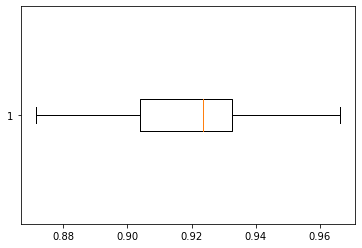

In [18]:
# Remove all Nan
cleanedList = [x for x in dissimilarity_plot_50 if str(x) != 'nan']

# Create boxplot 
plt.boxplot(cleanedList, vert=False, showfliers=False)

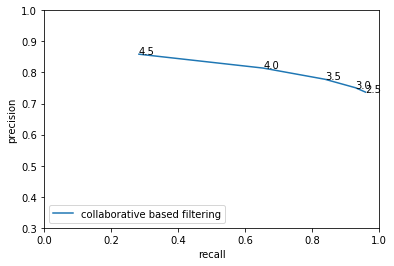

In [19]:
def recommended(predictions, treshold):
    return predictions.where(predictions["predicted rating"] >= treshold ).dropna().filter(items =['user_id', 'business_id'])

def hidden(predictions, treshold):
    return predictions.where(predictions["predicted rating"] < treshold ).dropna().filter(items =['user_id', 'business_id'])

def used(predictions, treshold):
    return predictions.where(predictions["stars"] >= treshold ).dropna().filter(items =['user_id', 'business_id'])
    
def unused(predictions, treshold):
    return predictions.where(predictions["stars"] < treshold ).dropna().filter(items =['user_id', 'business_id'])

def confusion(recommended, hidden, used, unused):
    
    true_positives = len(recommended.merge(used))
    false_positives = len(recommended.merge(unused))
    true_negatives = len(hidden.merge(unused))
    false_negatives = len(hidden.merge(used))
    
    confusion_matrix = pd.DataFrame([[true_positives, false_positives], [false_negatives, true_negatives]], 
                                    columns=['used', 'unused'], index=['recommended', 'hidden'])
    return confusion_matrix
            
def precision(confusion_matrix):
    return confusion_matrix['used']['recommended'] / (confusion_matrix['used']['recommended'] 
                                                      + confusion_matrix['unused']['recommended'])
            
def recall(confusion_matrix):
    return confusion_matrix['used']['recommended'] / (confusion_matrix['used']['recommended'] 
                                                      + confusion_matrix['used']['hidden'])

# precision-recall curve
treshold_used = 3.5
treshold_recommended = [2.5, 3.0, 3.5, 4.0, 4.5]

# collaborative based filtering
precision_collaborative_based = []
recall_collaborative_based = []

for treshold in treshold_recommended:
    
    confusion_matrix_coll = confusion(recommended(predicted_user_based, treshold), 
                                  hidden(predicted_user_based, treshold), 
                                  used(predicted_user_based, treshold_used), 
                                  unused(predicted_user_based, treshold_used))

    precision_collaborative_based.append(precision(confusion_matrix_coll))
    recall_collaborative_based.append(recall(confusion_matrix_coll))
    
# plot
plt.plot(recall_collaborative_based, precision_collaborative_based)
for r, p, t in zip(recall_collaborative_based, precision_collaborative_based, treshold_recommended):
    plt.text(r, p, t)

plt.xlim(0.0, 1.0)
plt.ylim(0.3, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')

plt.legend(['collaborative based filtering'], loc = 'lower left')   